In [17]:
import numpy as np
import pandas as pd
import os

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'scipy'

In [18]:
data_path = ['E:\Physionet_ICU_data\GOSIS\gossis-1\gossis-1-eicu-only']

In [5]:
filepath = os.sep.join(data_path + ['gosis-1-24hr.csv'])
filepath

'E:\\Physionet_ICU_data\\GOSIS\\gossis-1\\gossis-1-eicu-only\\gosis-1-24hr.csv'

In [19]:
data = pd.read_csv("patient_mortality/research/gossis-1-eicu-only-24hr.csv")
data.head()

C:\Users\vikas\AppData\Local\Temp\ipykernel_70164\745766498.py:1: DtypeWarning: Columns (1,2,4,7,9,10,12,13,16,19,22,25,26,214,215) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("patient_mortality/research/gossis-1-eicu-only-24hr.csv")


,patientunitstayid,data_source,encounter_id,hospital_id,patient_id,age,bmi,country,elective_surgery,ethnicity,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,146513.0,eicu,eicu_146513,73.0,eicu_002-35357,62.0,NaN,USA,0.0,Caucasian,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
1,190523.0,eicu,eicu_190523,56.0,eicu_002-6897,60.0,21.044822,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,210925.0,eicu,eicu_210925,73.0,eicu_002-65890,82.0,NaN,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
3,255589.0,eicu,eicu_255589,79.0,eicu_003-42506,67.0,18.491950,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
4,312464.0,eicu,eicu_312464,122.0,eicu_004-54157,68.0,22.201938,USA,0.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular


In [8]:
'age', 'bmi',
'elective_surgery', 'ethnicity', 'gender',
'hospital_admit_source',
'hospital_los_days'
, 'icu_admit_source', 'icu_admit_type', 'icu_disch_location', 'icu_los_days', 'icu_stay_type', 'icu_type', 'pre_icu_los_days'
'readmission_status'
'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis','apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
, 'd1_diasbp_invasive_min',
'd1_diasbp_max', 'd1_diasbp_min',
'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
'd1_resprate_max', 'd1_resprate_min',
'h1_diasbp_invasive_min',
'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
'h1_temp_max', 'h1_temp_min'
'd1_creatinine_max', 'd1_creatinine_min'
'd1_hematocrit_max', 'd1_hematocrit_min',
'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
'h1_creatinine_max', 'h1_creatinine_min',
'h1_hematocrit_max', 'h1_hematocrit_min',
'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
'd1_arterial_ph_max', 'd1_arterial_ph_min',
'fio2ratio_max', 'd1_pao2fio2ratio_min',
'apache_3j_hospital_death_prob', 'apache_3j_score', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'apsiii', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem'


('apache_3j_hospital_death_prob',
 'apache_3j_score',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'apsiii',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem',
 'apache_2_bodysystem')

In [7]:
#features available in both set apache3jscore
#change -  'bilirubin_apache', 'creatinine_apache'
#don't have - mbp apache, Arterial P02, Acid base status, Neurological score, myeloma,

#apache_3_score = ['temp_apache', 'bilirubin_apache', 'heart_rate_apache', 'urineoutput_apache', 'creatinine_apache', 'resprate_apache','wbc_apache', 'Age','hematocrit_apache', 'sodium_apache', 'albumin_apache', 'cirrhosis','immunosuppression', 'leukemia', 'solid_tumor_with_metastasis', 'lymphoma', 'hepatic_failure', 'aids']

#Apsiii
#not available = pulmonary artery oxygen differential (A-aDO2), serum potassium (K+),serum sodium (Na +), Cr,
#apsiii = ['heart_rate_apache', 'hematocrit_apache', 'temp_apache','map_apache', 'resprate_apache', 'pao2_apache', 'ph_apache','wbc_apache']

In [8]:
#features that affects model output, recall and also tested
#tested and recall drop = ['d1_temp_max','d1_temp_min','h1_mbp_min', 'd1_mbp_max','d1_mbp_min','h1_mbp_max','h1_wbc_max','h1_wbc_min', 'd1_wbc_max','d1_wbc_min','d1_resprate_max', 'd1_resprate_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min','d1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',   
#tested and more nan = ['ph_apache','d1_arterial_ph_min','d1_arterial_ph_max','d1_lactate_max','d1_lactate_min'
# tested = [bun_apache, 'h1_spo2_max','h1_spo2_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max', 'd1_sysbp_min','h1_sysbp_max', 'h1_sysbp_min','d1_heartrate_max', 'd1_heartrate_min', 
#     'd1_potassium_max', 'd1_potassium_min',]


In [20]:
print(data.columns.tolist())

['patientunitstayid', 'data_source', 'encounter_id', 'hospital_id', 'patient_id', 'age', 'bmi', 'country', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'hospital_bed_size', 'hospital_bed_size_numeric', 'hospital_death', 'hospital_disch_location', 'hospital_los_days', 'hospital_type', 'icu_admit_source', 'icu_admit_type', 'icu_death', 'icu_disch_location', 'icu_id', 'icu_los_days', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'pregnant', 'readmission_status', 'smoking_status', 'teaching_hospital', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', '

In [21]:
data.shape


(130754, 216)

In [22]:
variable_taken = ['d1_lactate_max','d1_sysbp_min','d1_heartrate_min','d1_arterial_ph_min','gcs_motor_apache','d1_temp_max','d1_creatinine_max','temp_apache','gcs_eyes_apache','d1_heartrate_max','age','d1_bun_max','d1_platelets_min','d1_mbp_min','d1_wbc_max','creatinine_apache','d1_pao2fio2ratio_min','heart_rate_apache','bun_apache','gcs_verbal_apache','wbc_apache','h1_heartrate_min','map_apache','d1_resprate_max','d1_potassium_min','h1_temp_max','h1_resprate_max','apache_2_diagnosis','sodium_apache','d1_sodium_min','d1_potassium_max','urineoutput_apache','d1_bilirubin_max','ventilated_apache','bilirubin_apache','h1_pao2fio2ratio_min','h1_sodium_max','h1_lactate_max','h1_wbc_min','h1_hemaglobin_max','h1_potassium_max','h1_potassium_min','h1_hco3_min','h1_sysbp_invasive_min','h1_bilirubin_max','icu_admit_source','solid_tumor_with_metastasis','apache_2_bodysystem','icu_type','apache_post_operative','intubated_apache','diabetes_mellitus','apache_3j_bodysystem','leukemia','d1_lactate_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min' , 'apache_3j_diagnosis', 'd1_mbp_noninvasive_min','d1_bun_min', 'd1_platelets_max','d1_wbc_min','d1_diasbp_min', 'd1_glucose_min','d1_creatinine_min' , 'd1_arterial_ph_max' , 'ph_apache', 'd1_hco3_max', 'd1_pao2fio2ratio_max','d1_resprate_min', 'd1_diasbp_noninvasive_min' , 'd1_glucose_max','d1_hco3_min', 'd1_sysbp_max' ]

len(variable_taken)

74

In [12]:
# variables_to_drop= ["patientunitstayid", "data_source",'smoking_status', "encounter_id", "hospital_id", "patient_id", "country", "hospital_admit_source", "hospital_bed_size", 
#     "hospital_bed_size_numeric", "hospital_disch_location", "hospital_type", 
#     "icu_admit_type", "icu_disch_location", "icu_id","pregnant", "d1_padias_invasive_max", 
#     "d1_padias_invasive_min", "d1_pamean_invasive_max", "d1_pamean_invasive_min", 
#     "d1_pasys_invasive_max", "d1_pasys_invasive_min", "h1_padias_invasive_max", 
#     "h1_padias_invasive_min", "h1_pamean_invasive_max", "h1_pamean_invasive_min", 
#     "h1_pasys_invasive_max", "h1_pasys_invasive_min", "apache_3j_hospital_death_prob",
#     "icu_death",'bmi', 'elective_surgery', 'ethnicity', 'height', 'hospital_los_days', 
#      'icu_los_days', 'icu_stay_type', 'pre_icu_los_days', 'readmission_status', 'teaching_hospital',
#   'weight', 'albumin_apache','arf_apache',
#   'fio2_apache', 'gcs_unable_apache',
#      'glucose_apache',  'hematocrit_apache',
#     'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'resprate_apache',
#      'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max',
#     'd1_diasbp_noninvasive_max', 'd1_mbp_invasive_max',
#     'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_noninvasive_max',
#     'd1_spo2_max', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min',  
#     'd1_sysbp_noninvasive_max', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min',
#     'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_mbp_invasive_max',
#     'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min','h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',  'd1_bilirubin_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_sodium_max', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_sodium_min', 'h1_wbc_max','d1_arterial_pco2_max', 'd1_arterial_pco2_min','d1_arterial_po2_max', 'd1_arterial_po2_min','h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max','apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression',
#     'lymphoma', 'apache_3j_bodysystem', 'icu_admit_source','icu_type', 'apache_2_bodysystem' ]
# # Drop the variables

# data = data.drop(variables_to_drop, axis=1)

In [23]:
variables_to_drop= ["patientunitstayid", "data_source",'smoking_status', "encounter_id", "hospital_id", "patient_id", "country", "hospital_admit_source", "hospital_bed_size", 
    "hospital_bed_size_numeric", "hospital_disch_location", "hospital_type", 
    "icu_admit_type", "icu_disch_location", "icu_id","pregnant", "d1_padias_invasive_max", 'apache_3j_score', 'apsiii',
    "d1_padias_invasive_min", "d1_pamean_invasive_max", "d1_pamean_invasive_min", 
    "d1_pasys_invasive_max", "d1_pasys_invasive_min", "h1_padias_invasive_max", 
    "h1_padias_invasive_min", "h1_pamean_invasive_max", "h1_pamean_invasive_min", 
    "h1_pasys_invasive_max", "h1_pasys_invasive_min", "apache_3j_hospital_death_prob",
    "hospital_death",'icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem','apache_3j_hospital_death_prob', 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob', 'ethnicity', 'icu_admit_source',
    'apache_4a_hospital_death_prob',
    'apache_4a_icu_death_prob',
     'h1_albumin_max',
    'h1_albumin_min',
    'h1_arterial_pco2_max',
    'h1_arterial_pco2_min',
    'h1_arterial_ph_max',
    'h1_arterial_ph_min',
    'h1_arterial_po2_max',
    'h1_arterial_po2_min',
    'h1_bilirubin_max',
    'h1_bilirubin_min',
    'h1_bun_max',
    'h1_bun_min',
    'h1_calcium_max',
    'h1_calcium_min',
    'h1_creatinine_max',
    'h1_creatinine_min',
    'h1_diasbp_invasive_max',
    'h1_diasbp_invasive_min',
    'h1_diasbp_max',
    'h1_diasbp_min',
    'h1_diasbp_noninvasive_max',
    'h1_diasbp_noninvasive_min',
    'h1_glucose_max',
    'h1_glucose_min',
    'h1_hco3_max',
    'h1_hco3_min',
    'h1_hematocrit_max',
    'h1_hematocrit_min',
    'h1_hemaglobin_max',
    'h1_hemaglobin_min',
    'h1_inr_max',
    'h1_inr_min',
    'h1_lactate_max',
    'h1_lactate_min',
    'h1_mbp_invasive_max',
    'h1_mbp_invasive_min',
    
    'h1_mbp_noninvasive_max',
    'h1_mbp_noninvasive_min',
    'h1_pao2fio2ratio_max',
    'h1_pao2fio2ratio_min',
    'h1_platelets_max',
    'h1_platelets_min',
    
    'h1_resprate_max',
    'h1_resprate_min',
    'h1_sodium_max',
    'h1_sodium_min',
    'd1_lactate_max','d1_lactate_min',

    'h1_sysbp_invasive_max',
    'h1_sysbp_invasive_min',
    'd1_temp_max','d1_temp_min',
    'h1_sysbp_noninvasive_max',
    'h1_sysbp_noninvasive_min',
    'h1_temp_max',
    'h1_temp_min',
    
    'intubated_apache',
    
    'paco2_apache',
    'paco2_for_ph_apache',
    
    'pre_icu_los_days',
    'readmission_status',
    'teaching_hospital',

    'h1_mbp_min', 'd1_mbp_max','d1_mbp_min','h1_mbp_max',            
    'd1_arterial_ph_min','d1_arterial_ph_max' ,              
    'd1_albumin_max',
    'd1_albumin_min',
    'd1_arterial_pco2_max',
    'd1_arterial_pco2_min',
    'd1_arterial_po2_max',
    'd1_arterial_po2_min',
    'd1_bilirubin_max',
    'd1_bilirubin_min',
    'd1_bun_max',
    'd1_bun_min',
    'd1_calcium_max',
    'd1_calcium_min',
    'd1_creatinine_max',
    'd1_creatinine_min',
    'd1_diasbp_invasive_max',
    'd1_diasbp_invasive_min',
    'd1_diasbp_max',
    'd1_diasbp_min',
    
    'd1_glucose_max',
    'd1_glucose_min',
    'd1_hco3_max',
    'd1_hco3_min',
    'd1_hematocrit_max',
    'd1_hematocrit_min',
    'd1_hemaglobin_max',
    'd1_hemaglobin_min',
    'd1_inr_max',
    'd1_inr_min',
    
    'd1_mbp_invasive_max',
    'd1_mbp_invasive_min',
    'h1_wbc_max','h1_wbc_min', 'd1_wbc_max','d1_wbc_min',
    'd1_mbp_noninvasive_max',
    'd1_mbp_noninvasive_min',
    'd1_pao2fio2ratio_max',
    'd1_pao2fio2ratio_min',
    'd1_platelets_max',
    'd1_platelets_min',
    'h1_potassium_max', 'h1_potassium_min',
    'd1_resprate_max', 'd1_resprate_min',
    'd1_sodium_max',
    'd1_sodium_min',
    'd1_sysbp_invasive_max',
    
    'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
    'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',   
    'fio2_apache',                               
    'pao2_apache',                             
    'd1_sysbp_invasive_min',         
    'bilirubin_apache',               
    'albumin_apache',
                    
    'cirrhosis',
    'hepatic_failure', 
    'lymphoma', 
    'leukemia',
    'aids',  
    'ph_apache',               

    'gender', 
    'diabetes_mellitus', 
    'gcs_unable_apache', 
    'elective_surgery', 
    'solid_tumor_with_metastasis', 
    'arf_apache', 
    'immunosuppression',
    'apache_post_operative',
     'bmi',        
    'apache_2_diagnosis', 'apache_3j_diagnosis' ,  
    'gcs_motor_apache', 'gcs_verbal_apache', 
   
]
data = data.drop(variables_to_drop, axis=1)
    

In [24]:
data.shape


(130754, 33)

In [25]:
print(data.columns.tolist())
print(data.count())


['age', 'height', 'hospital_los_days', 'icu_death', 'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']
age                   35196
height                35775
hospital_los_days     36999
icu_death             36999
icu_los_days          36999
weight                35387
bun_apache            26657
creatinine_apache     26825
gcs_eyes_apache       36079
glucose_apache        30148
heart_rate_apache     36488
hematocrit_apache     25973
map_apache            36435
resprate_apache       36300
sodium_apache         26915
temp_apache           

In [16]:
# stats_df = data.describe()
# print(stats_df)

In [26]:
# Get the names of columns with numerical values
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Print the names of numerical columns
i=0
print("Numerical columns:")
for i in range(len(numerical_columns)):
    i = i+1;

print(i)

Numerical columns:
33


In [27]:
# Get the names of all columns
all_columns = data.columns.tolist()

# Get the names of columns with numerical values
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Find the features which are not numerical
non_numerical_columns = [col for col in all_columns if col not in numerical_columns]

# Print the names of non-numerical columns
print("Non-numerical columns:")
for column in non_numerical_columns:
    print(column)

Non-numerical columns:


In [19]:
# onehot_data = pd.get_dummies(data, columns = [ 'gender', ])
# print(onehot_data.shape)



In [20]:
onehot_data = data

In [21]:
print(onehot_data.columns.tolist())

['age', 'height', 'hospital_los_days', 'icu_death', 'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
try:
  import seaborn as sns
except:
    print('Seaborn must be installed for this course. Execute the following:')
    print('`conda install seaborn`')
    print('from a terminal and restart the kernel.')

In [24]:
onehot_data.head(100)

,age,height,hospital_los_days,icu_death,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,...,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min
0,62.0,170.20,14.367361,0,0.166667,NaN,NaN,NaN,4.0,323.0,...,110.0,80.0,110.0,102.0,100.0,99.0,110.0,80.0,NaN,NaN
1,60.0,182.90,2.972222,0,0.166667,70.4,NaN,NaN,4.0,185.0,...,124.0,83.0,104.0,94.0,97.0,94.0,124.0,101.0,NaN,NaN
2,82.0,NaN,0.168056,1,0.166667,NaN,NaN,NaN,4.0,103.0,...,139.0,77.0,97.0,86.0,100.0,96.0,139.0,77.0,NaN,NaN
3,67.0,175.26,34.101389,0,0.166667,56.8,NaN,NaN,4.0,79.0,...,104.0,86.0,69.0,69.0,100.0,96.0,98.0,98.0,3.9,3.9
4,68.0,193.00,4.148611,0,0.166667,82.7,NaN,NaN,4.0,71.0,...,129.0,103.0,106.0,103.0,94.0,93.0,128.0,124.0,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55.0,177.00,2.050694,0,0.172222,NaN,NaN,NaN,4.0,NaN,...,101.0,94.0,68.0,60.0,99.0,98.0,94.0,94.0,3.9,3.9
96,81.0,142.00,7.063194,0,0.172222,56.0,NaN,NaN,3.0,NaN,...,122.0,88.0,106.0,102.0,100.0,97.0,122.0,88.0,NaN,NaN
97,63.0,165.00,0.189583,0,0.172222,76.0,24.0,1.00,4.0,103.0,...,134.0,95.0,95.0,95.0,97.0,97.0,134.0,134.0,4.9,4.9
98,71.0,152.40,0.174306,1,0.172222,73.7,21.0,1.04,1.0,157.0,...,120.0,75.0,112.0,108.0,90.0,90.0,120.0,114.0,3.9,3.9


In [25]:
onehot_data.isnull().sum()

age                          1803
height                       1224
hospital_los_days               0
icu_death                       0
icu_los_days                    0
weight                       1612
bun_apache                  10342
creatinine_apache           10174
gcs_eyes_apache               920
glucose_apache               6851
heart_rate_apache             511
hematocrit_apache           11026
map_apache                    564
resprate_apache               699
sodium_apache               10084
temp_apache                  2771
urineoutput_apache          18931
ventilated_apache             336
wbc_apache                  11787
d1_heartrate_max              167
d1_heartrate_min              167
d1_spo2_max                   318
d1_spo2_min                   318
d1_sysbp_max                  159
d1_sysbp_min                  159
d1_sysbp_noninvasive_max      355
d1_sysbp_noninvasive_min      355
h1_heartrate_max             1149
h1_heartrate_min             1149
h1_spo2_max   

In [26]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate total missing values for each column
missing_values = onehot_data.isnull().sum()

# Sort the columns based on the number of missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

# Select the top 20 columns with the highest number of missing values
top_20_missing_values = sorted_missing_values.tail(70)

# Display the result
print(top_20_missing_values)


urineoutput_apache          18931
wbc_apache                  11787
hematocrit_apache           11026
bun_apache                  10342
creatinine_apache           10174
sodium_apache               10084
glucose_apache               6851
d1_potassium_min             6473
d1_potassium_max             6473
temp_apache                  2771
h1_spo2_min                  1873
h1_spo2_max                  1873
age                          1803
h1_sysbp_min                 1635
h1_sysbp_max                 1635
weight                       1612
height                       1224
h1_heartrate_min             1149
h1_heartrate_max             1149
gcs_eyes_apache               920
resprate_apache               699
map_apache                    564
heart_rate_apache             511
d1_sysbp_noninvasive_max      355
d1_sysbp_noninvasive_min      355
ventilated_apache             336
d1_spo2_min                   318
d1_spo2_max                   318
d1_heartrate_min              167
d1_heartrate_m

In [27]:
#data.drop(['Serial Number','Lactate', 'PCO2', 'APACHE_II', 'qSOFA','Procalcitonin', 'PF_ratio',  'Met_Acidosis', 'Resp_Acidosis', 'Cultures','Diagnosis'], axis = 1, inplace= True)

In [28]:
# import pandas as pd

# # Assuming your binary categorical column is named 'binary_column'
# df['binary_column'].fillna(df['binary_column'].mode()[0], inplace=True)


In [29]:
# Get the names of columns with numerical values
numerical_columns = onehot_data.select_dtypes(include=['number']).columns.tolist()

print("Numerical columns:")
count = 0
lst = []
for column in numerical_columns:
    lst.append(column)
    count = count+1
print(count) 
print(lst)


Numerical columns:
35
['age', 'height', 'hospital_los_days', 'icu_death', 'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']


In [30]:
# Get the names of all columns
all_columns = onehot_data.columns.tolist()

# Get the names of columns with numerical values
numerical_columns = onehot_data.select_dtypes(include=['number']).columns.tolist()

# Find the features which are not numerical
non_numerical_columns = [col for col in all_columns if col not in numerical_columns]

# Print the names of non-numerical columns
print("Non-numerical columns:")
count = 0
lst = []
for column in non_numerical_columns:
    lst.append(column)
    count = count+1
print(count) 
print(lst)
print("numerical", numerical_columns)

Non-numerical columns:
0
[]
numerical ['age', 'height', 'hospital_los_days', 'icu_death', 'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']


In [31]:
onehot_data.head()

,age,height,hospital_los_days,icu_death,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,...,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min
0,62.0,170.20,14.367361,0,0.166667,NaN,NaN,NaN,4.0,323.0,...,110.0,80.0,110.0,102.0,100.0,99.0,110.0,80.0,NaN,NaN
1,60.0,182.90,2.972222,0,0.166667,70.4,NaN,NaN,4.0,185.0,...,124.0,83.0,104.0,94.0,97.0,94.0,124.0,101.0,NaN,NaN
2,82.0,NaN,0.168056,1,0.166667,NaN,NaN,NaN,4.0,103.0,...,139.0,77.0,97.0,86.0,100.0,96.0,139.0,77.0,NaN,NaN
3,67.0,175.26,34.101389,0,0.166667,56.8,NaN,NaN,4.0,79.0,...,104.0,86.0,69.0,69.0,100.0,96.0,98.0,98.0,3.9,3.9
4,68.0,193.00,4.148611,0,0.166667,82.7,NaN,NaN,4.0,71.0,...,129.0,103.0,106.0,103.0,94.0,93.0,128.0,124.0,4.2,4.2


In [32]:
# cat_data = ['data_source', 'encounter_id', 'patient_id', 'country', 'hospital_bed_size', 'hospital_disch_location', 'icu_disch_location', 'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown', 'gender_F', 'gender_M', 'icu_admit_source_Accident & Emergency', 'icu_admit_source_Floor', 'icu_admit_source_Operating Room / Recovery', 'icu_admit_source_Other Hospital', 'icu_admit_source_Other ICU', 'hospital_admit_source_Acute Care/Floor', 'hospital_admit_source_Chest Pain Center', 'hospital_admit_source_Direct Admit', 'hospital_admit_source_Emergency Department', 'hospital_admit_source_Floor', 'hospital_admit_source_ICU', 'hospital_admit_source_ICU to SDU', 'hospital_admit_source_Observation', 'hospital_admit_source_Operating Room', 'hospital_admit_source_Other', 'hospital_admit_source_Other Hospital', 'hospital_admit_source_Other ICU', 'hospital_admit_source_PACU', 'hospital_admit_source_Recovery Room', 'hospital_admit_source_Step-Down Unit (SDU)', 'icu_stay_type_admit', 'icu_stay_type_readmit', 'icu_stay_type_transfer', 'icu_type_CCU-CTICU', 'icu_type_CSICU', 'icu_type_CTICU', 'icu_type_Cardiac ICU', 'icu_type_MICU', 'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU', 'icu_type_SICU', 'apache_3j_bodysystem_Cardiovascular', 'apache_3j_bodysystem_Gastrointestinal', 'apache_3j_bodysystem_Genitourinary', 'apache_3j_bodysystem_Gynecological', 'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Musculoskeletal/Skin', 'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis', 'apache_3j_bodysystem_Trauma', 'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary', 'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma', 'apache_2_bodysystem_Undefined Diagnoses', 'apache_2_bodysystem_Undefined diagnoses']
# print(len(cat_data))

In [33]:
# from sklearn.preprocessing import LabelEncoder
# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit and transform the data
# onehot_data['gender'] = label_encoder.fit_transform(onehot_data['gender'])

# print(onehot_data)

In [34]:
cat_data = ['icu_death',    ]

#Loop through each categorical column and fill missing values with the mode
for x in cat_data:
    mode_value = onehot_data[x].mode()[0]  # Calculate the mode
    onehot_data[x].fillna(mode_value, inplace=True)  # Fill missing values with the mode


onehot_data.head(50)


,age,height,hospital_los_days,icu_death,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,...,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min
0,62.0,170.20,14.367361,0,0.166667,NaN,NaN,NaN,4.0,323.0,...,110.0,80.0,110.0,102.0,100.0,99.0,110.0,80.0,NaN,NaN
1,60.0,182.90,2.972222,0,0.166667,70.40,NaN,NaN,4.0,185.0,...,124.0,83.0,104.0,94.0,97.0,94.0,124.0,101.0,NaN,NaN
2,82.0,NaN,0.168056,1,0.166667,NaN,NaN,NaN,4.0,103.0,...,139.0,77.0,97.0,86.0,100.0,96.0,139.0,77.0,NaN,NaN
3,67.0,175.26,34.101389,0,0.166667,56.80,NaN,NaN,4.0,79.0,...,104.0,86.0,69.0,69.0,100.0,96.0,98.0,98.0,3.9,3.9
4,68.0,193.00,4.148611,0,0.166667,82.70,NaN,NaN,4.0,71.0,...,129.0,103.0,106.0,103.0,94.0,93.0,128.0,124.0,4.2,4.2
5,NaN,165.10,9.107639,0,0.166667,59.60,NaN,NaN,NaN,NaN,...,135.0,118.0,98.0,82.0,98.0,94.0,133.0,123.0,4.4,4.4
6,80.0,NaN,7.293056,0,0.166667,NaN,NaN,NaN,NaN,77.0,...,114.0,91.0,115.0,115.0,NaN,NaN,111.0,111.0,5.6,5.1
7,47.0,175.00,0.166667,0,0.166667,112.40,NaN,NaN,4.0,NaN,...,120.0,112.0,106.0,102.0,100.0,99.0,120.0,113.0,NaN,NaN
8,44.0,170.20,0.982639,0,0.166667,96.80,NaN,NaN,4.0,NaN,...,122.0,102.0,61.0,56.0,94.0,91.0,117.0,102.0,NaN,NaN
9,55.0,149.80,1.125000,0,0.166667,90.10,NaN,NaN,4.0,NaN,...,159.0,105.0,75.0,75.0,97.0,97.0,141.0,141.0,NaN,NaN


In [35]:
# num_data = ['age', 'bmi', 'elective_surgery', 'height', 'hospital_death', 'hospital_los_days', 'icu_death', 'icu_los_days', 'pre_icu_los_days', 'readmission_status', 'teaching_hospital', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min',
#             'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max',
#             'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 
#             'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 
#             'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 
#             'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',
#             'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'apache_3j_score', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'apsiii', 
#             'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [42]:
import pandas as pd
import numpy as np


num_data = ['age', 'height', 'hospital_los_days', 'icu_death', 'icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache' , 'd1_heartrate_max', 'd1_heartrate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_potassium_max', 'd1_potassium_min']

#Separate the numeric columns
numeric_columns = onehot_data[num_data].copy()  # Create a copy to avoid warnings

# Fill missing values with the mean for the numeric columns
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Update the original DataFrame with the filled values
onehot_data[num_data] = numeric_columns

# Now, your numeric columns should be filled with the mean, and non-numeric columns remain unchanged.
onehot_data.head(50)


,age,height,hospital_los_days,icu_death,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,...,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min
0,62.000000,170.200000,14.367361,0,0.166667,83.413845,22.585186,1.351332,4.000000,323.000000,...,110.000000,80.000000,110.000000,102.000000,100.000000,99.000000,110.000000,80.000000,4.207813,3.993568
1,60.000000,182.900000,2.972222,0,0.166667,70.400000,22.585186,1.351332,4.000000,185.000000,...,124.000000,83.000000,104.000000,94.000000,97.000000,94.000000,124.000000,101.000000,4.207813,3.993568
2,82.000000,169.435677,0.168056,1,0.166667,83.413845,22.585186,1.351332,4.000000,103.000000,...,139.000000,77.000000,97.000000,86.000000,100.000000,96.000000,139.000000,77.000000,4.207813,3.993568
3,67.000000,175.260000,34.101389,0,0.166667,56.800000,22.585186,1.351332,4.000000,79.000000,...,104.000000,86.000000,69.000000,69.000000,100.000000,96.000000,98.000000,98.000000,3.900000,3.900000
4,68.000000,193.000000,4.148611,0,0.166667,82.700000,22.585186,1.351332,4.000000,71.000000,...,129.000000,103.000000,106.000000,103.000000,94.000000,93.000000,128.000000,124.000000,4.200000,4.200000
5,60.318559,165.100000,9.107639,0,0.166667,59.600000,22.585186,1.351332,3.664375,155.429448,...,135.000000,118.000000,98.000000,82.000000,98.000000,94.000000,133.000000,123.000000,4.400000,4.400000
6,80.000000,169.435677,7.293056,0,0.166667,83.413845,22.585186,1.351332,3.664375,77.000000,...,114.000000,91.000000,115.000000,115.000000,97.952827,95.220407,111.000000,111.000000,5.600000,5.100000
7,47.000000,175.000000,0.166667,0,0.166667,112.400000,22.585186,1.351332,4.000000,155.429448,...,120.000000,112.000000,106.000000,102.000000,100.000000,99.000000,120.000000,113.000000,4.207813,3.993568
8,44.000000,170.200000,0.982639,0,0.166667,96.800000,22.585186,1.351332,4.000000,155.429448,...,122.000000,102.000000,61.000000,56.000000,94.000000,91.000000,117.000000,102.000000,4.207813,3.993568
9,55.000000,149.800000,1.125000,0,0.166667,90.100000,22.585186,1.351332,4.000000,155.429448,...,159.000000,105.000000,75.000000,75.000000,97.000000,97.000000,141.000000,141.000000,4.207813,3.993568


In [43]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Shuffle the DataFrame
onehot_data = onehot_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [44]:
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# for x in cat_data:
#     onehot_data[x]= lb.fit_transform(onehot_data[x])
# onehot_data.head(50)

In [45]:
onehot_data.shape

(36999, 35)

In [46]:
# import warnings
# warnings.filterwarnings('ignore', module = 'sklearn' )
# from sklearn.preprocessing import MinMaxScaler
# msc = MinMaxScaler()
# onehot_data = pd.DataFrame(msc.fit_transform(onehot_data), columns=onehot_data.columns)
# onehot_data.head().T

In [47]:
x_cols = [x for x in onehot_data.columns if x!='icu_death']
x_data = onehot_data[x_cols]
y_data = onehot_data['icu_death']


In [48]:
# Model preprocessing done Now build model

#

In [49]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [50]:
onehot_data.icu_death.value_counts()

icu_death
0    34857
1     2142
Name: count, dtype: int64

In [51]:
# with original data and without Smote

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  classification_report

In [53]:
import pycaret
pycaret.__version__

'3.3.1'

In [54]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [55]:
from pycaret.classification import setup, compare_models

In [56]:
#For Regression
from pycaret.regression import *
#For Classification
from pycaret.classification import *

In [57]:
exp = setup(onehot_data, target='icu_death')


,Description,Value
0,Session id,6910
1,Target,icu_death
2,Target type,Binary
3,Original data shape,"(36999, 35)"
4,Transformed data shape,"(36999, 35)"
5,Transformed train set shape,"(25899, 35)"
6,Transformed test set shape,"(11100, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


In [58]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9817,0.9929,0.8452,0.8398,0.8419,0.8322,0.8325,0.7720
rf,Random Forest Classifier,0.9806,0.9903,0.7985,0.8568,0.8261,0.8159,0.8167,1.3000
gbc,Gradient Boosting Classifier,0.9806,0.9912,0.8099,0.8487,0.8281,0.8179,0.8185,2.3830
ada,Ada Boost Classifier,0.9771,0.9908,0.7625,0.8288,0.7940,0.7819,0.7828,0.5420
lr,Logistic Regression,0.9764,0.9905,0.7531,0.8256,0.7870,0.7746,0.7759,1.2470
et,Extra Trees Classifier,0.9751,0.9834,0.6744,0.8677,0.7582,0.7454,0.7523,0.5990
qda,Quadratic Discriminant Analysis,0.9730,0.9864,0.8586,0.7264,0.7863,0.7720,0.7754,0.0810
dt,Decision Tree Classifier,0.9694,0.8532,0.7218,0.7426,0.7310,0.7148,0.7154,0.1400
lda,Linear Discriminant Analysis,0.9688,0.9675,0.6777,0.7586,0.7149,0.6985,0.7003,0.0470
nb,Naive Bayes,0.9686,0.9857,0.8773,0.6783,0.7642,0.7477,0.7553,0.0500


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9784,0.9881,0.7933,0.8264,0.8095,0.7981,0.7983
1,0.9822,0.9947,0.8467,0.8467,0.8467,0.8372,0.8372
2,0.9788,0.9922,0.8267,0.8105,0.8185,0.8072,0.8073
3,0.9826,0.9946,0.8800,0.8302,0.8544,0.8451,0.8455
4,0.9799,0.9931,0.7867,0.8551,0.8194,0.8088,0.8096
5,0.9819,0.9942,0.8600,0.8323,0.8459,0.8363,0.8364
6,0.9853,0.9957,0.8800,0.8684,0.8742,0.8664,0.8664
7,0.9803,0.9912,0.9000,0.7895,0.8411,0.8307,0.8327
8,0.9830,0.9906,0.8733,0.8397,0.8562,0.8472,0.8474


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [72]:
model = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9964,0.8867,0.8693,0.8779,0.8703,0.8704
1,0.9799,0.9912,0.8200,0.8311,0.8255,0.8149,0.8149
2,0.9807,0.9943,0.8467,0.8247,0.8355,0.8253,0.8254
3,0.9853,0.9960,0.8733,0.8733,0.8733,0.8655,0.8655
4,0.9842,0.9944,0.8800,0.8516,0.8656,0.8572,0.8573
5,0.9849,0.9959,0.9000,0.8491,0.8738,0.8658,0.8662
6,0.9807,0.9920,0.8467,0.8247,0.8355,0.8253,0.8254
7,0.9842,0.9954,0.8800,0.8516,0.8656,0.8572,0.8573
8,0.9768,0.9910,0.8667,0.7647,0.8125,0.8002,0.8020


In [53]:
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9880,0.9966,0.8867,0.9048,0.8956,0.8893,0.8893
1,0.9799,0.9916,0.8000,0.8451,0.8219,0.8113,0.8116
2,0.9799,0.9945,0.8133,0.8356,0.8243,0.8137,0.8138
3,0.9861,0.9956,0.8733,0.8851,0.8792,0.8718,0.8718
4,0.9857,0.9960,0.8800,0.8742,0.8771,0.8695,0.8695
5,0.9849,0.9959,0.9000,0.8491,0.8738,0.8658,0.8662
6,0.9822,0.9928,0.8400,0.8514,0.8456,0.8362,0.8362
7,0.9857,0.9958,0.8867,0.8693,0.8779,0.8703,0.8704
8,0.9784,0.9912,0.8600,0.7866,0.8217,0.8102,0.8111


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [54]:
pred = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9812,0.9923,0.8725,0.8154,0.8430,0.8330,0.8335


In [55]:
pred.head(50)

,age,height,hospital_los_days,icu_los_days,weight,bun_apache,creatinine_apache,gcs_eyes_apache,glucose_apache,heart_rate_apache,...,h1_heartrate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_potassium_max,d1_potassium_min,icu_death,prediction_label,prediction_score
33601,60.000000,185.399994,0.861111,0.818750,100.599998,22.585186,1.351332,4.000000,155.429443,48.0,...,46.000000,100.000000,93.000000,114.000000,100.00000,3.500000,3.500000,0,0,0.9990
28354,72.000000,163.000000,3.806250,0.683333,91.300003,13.000000,0.780000,4.000000,110.000000,99.0,...,88.000000,100.000000,92.000000,144.000000,141.00000,4.300000,4.300000,0,0,1.0000
29065,81.000000,160.000000,7.711805,1.004861,53.500000,22.585186,1.351332,4.000000,155.429443,96.0,...,89.000000,99.000000,97.000000,211.000000,211.00000,5.300000,5.300000,0,0,1.0000
27100,65.000000,155.000000,0.845139,0.845139,71.300003,10.000000,0.640000,3.000000,133.000000,100.0,...,80.000000,98.000000,92.000000,154.000000,136.00000,4.400000,4.400000,0,0,0.9990
36655,65.000000,188.000000,0.956944,0.225000,81.800003,22.585186,1.351332,4.000000,155.429443,117.0,...,108.000000,95.000000,95.000000,137.000000,122.00000,4.207813,3.993568,0,0,0.9986
36384,30.000000,162.600006,7.602778,0.693056,57.900002,5.000000,0.550000,4.000000,96.000000,102.0,...,76.000000,100.000000,93.000000,153.000000,126.00000,4.000000,4.000000,0,0,1.0000
10051,75.000000,172.699997,0.881250,0.881250,74.839996,10.000000,0.750000,4.000000,104.000000,114.0,...,74.000000,96.000000,92.000000,164.000000,141.00000,4.000000,4.000000,0,0,0.9995
684,89.000000,180.000000,2.340972,0.462500,79.500000,22.585186,1.351332,4.000000,111.000000,39.0,...,65.000000,98.000000,92.000000,135.000000,114.00000,4.207813,3.993568,0,0,0.9999
9822,85.000000,165.100006,2.431944,0.875000,68.000000,22.585186,1.351332,4.000000,155.429443,110.0,...,94.000000,97.000000,97.000000,155.000000,153.00000,4.300000,4.300000,0,0,0.9999
14744,72.000000,160.000000,9.199306,0.947917,93.099998,22.585186,1.351332,4.000000,212.000000,135.0,...,120.000000,99.000000,99.000000,122.000000,100.00000,4.100000,3.900000,0,0,0.9999


In [58]:
# Evaluate the model
#evaluate_model(model)


In [58]:
# Predict on the test set
#predictions = predict_model(model)

#Create a DataFrame for new data with an index
new_data = pd.DataFrame({
    
    'age': [72],
    'height':[167.6] , 
    'hospital_los_days':[0.215972222] ,
    'icu_los_days':[0.167361111],
    'weight': [74.3],
    'bun_apache':[np.nan] ,
    'creatinine_apache':[np.nan],
    'gcs_eyes_apache':[1],
    'glucose_apache':[171],
    'heart_rate_apache':[138], 
    'hematocrit_apache':[np.nan],
    'map_apache':[140],
    'resprate_apache':[34],
    'sodium_apache':[np.nan],
    'temp_apache':[np.nan], 
    'urineoutput_apache':[np.nan], 
    'ventilated_apache':[1],
    'wbc_apache':[np.nan],
    'd1_heartrate_max':[123],
    'd1_heartrate_min':[123],
    'd1_spo2_max':[98], 
    'd1_spo2_min':[98],
    'd1_sysbp_max':[54],
    'd1_sysbp_min':[54],
    'h1_heartrate_max':[123],
    'h1_heartrate_min':[123],
    'h1_spo2_max':[98],
    'h1_spo2_min':[98],
    'h1_sysbp_max':[54],
    'h1_sysbp_min':[54],
    'd1_potassium_max':[np.nan], 
    'd1_potassium_min':[np.nan],

    
      # Assuming 0 for female and 1 for male
})

# Make predictions
new_predictions = predict_model(model, data=new_data)

# Display predictions
print(new_predictions)

# Predict on new data
# new_data = pd.DataFrame({
#     'bmi': 26.45092019,
#     'hospital_los_days': 0.215972222,
#     'icu_los_days': 0.167361111,
#     'albumin_apache': 2.5,
#     'apache_2_diagnosis': 114,
#     'apache_3j_diagnosis': 102.01,
#     'apache_post_operative': 0,
#     'arf_apache': 0,
#     'fio2_apache': 1,
#     'map_apache': 140,
#     'ph_apache': 7.344,
#     'temp_apache': 36.4,
#     'ventilated_apache': 1,
#     'wbc_apache': 1.5,
#     'd1_heartrate_max': 123,
#     'd1_heartrate_min': 123,
#     'd1_sysbp_invasive_min':25 ,
#     'h1_heartrate_max': 123,
#     'h1_heartrate_min': 123,
#     'd1_arterial_ph_max': 7.344,
#     'd1_arterial_ph_min':7.338 ,
#     'apache_3j_score': 96,
#     'apsiii': 80,
#     'gender': 0,





   age      height  hospital_los_days  icu_los_days     weight  bun_apache  \
0   72  167.600006           0.215972      0.167361  74.300003         NaN   

   creatinine_apache  gcs_eyes_apache  glucose_apache  heart_rate_apache  ...  \
0                NaN                1             171                138  ...   

   h1_heartrate_max  h1_heartrate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_max  \
0               123               123           98           98            54   

   h1_sysbp_min  d1_potassium_max  d1_potassium_min  prediction_label  \
0            54               NaN               NaN                 1   

   prediction_score  
0            0.9484  

[1 rows x 34 columns]


In [73]:
save_model(model, 'lightgbm_Gosis_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'height',
                                              'hospital_los_days',
                                              'icu_los_days', 'weight',
                                              'bun_apache', 'creatinine_apache',
                                              'gcs_eyes_apache',
                                              'glucose_apache',
                                              'heart_rate_apache',
                                              'hematocrit_apache', 'map_apache',
                                              'resprate_apache', 'sodium_apache',
                                              'temp_apache',
                                              'urineoutput_ap...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                            

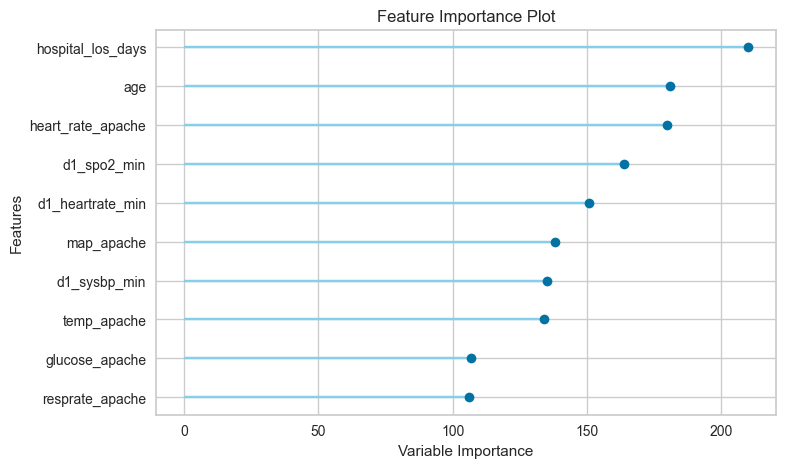

In [59]:
plot_model(model, plot='feature')


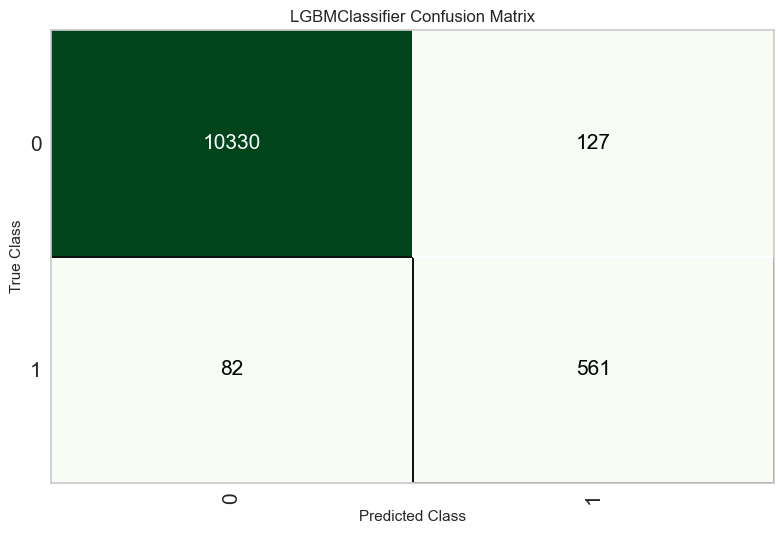

In [60]:
plot_model(model, plot = 'confusion_matrix')

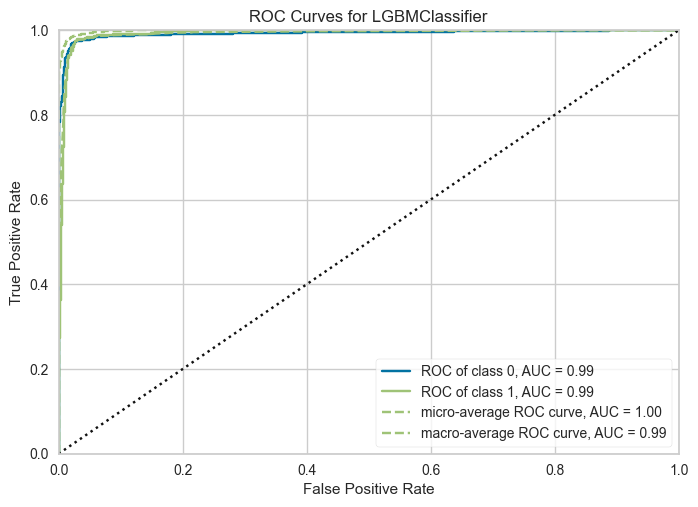

In [61]:
plot_model(model, plot = 'auc')

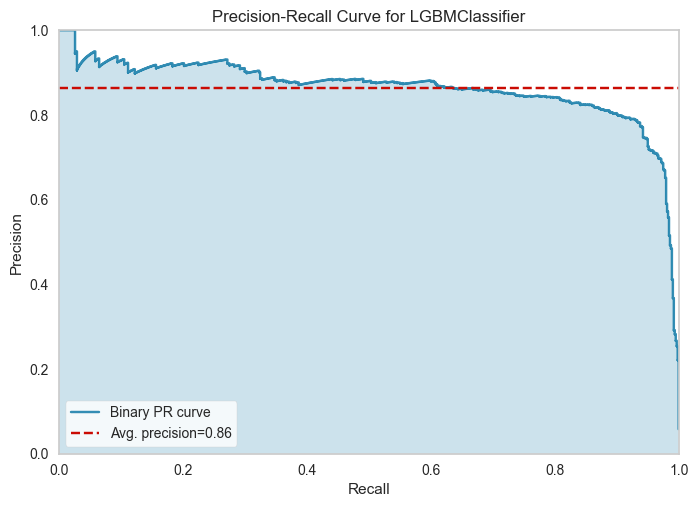

In [62]:
plot_model(model, plot = 'pr')

In [63]:
pip install shap


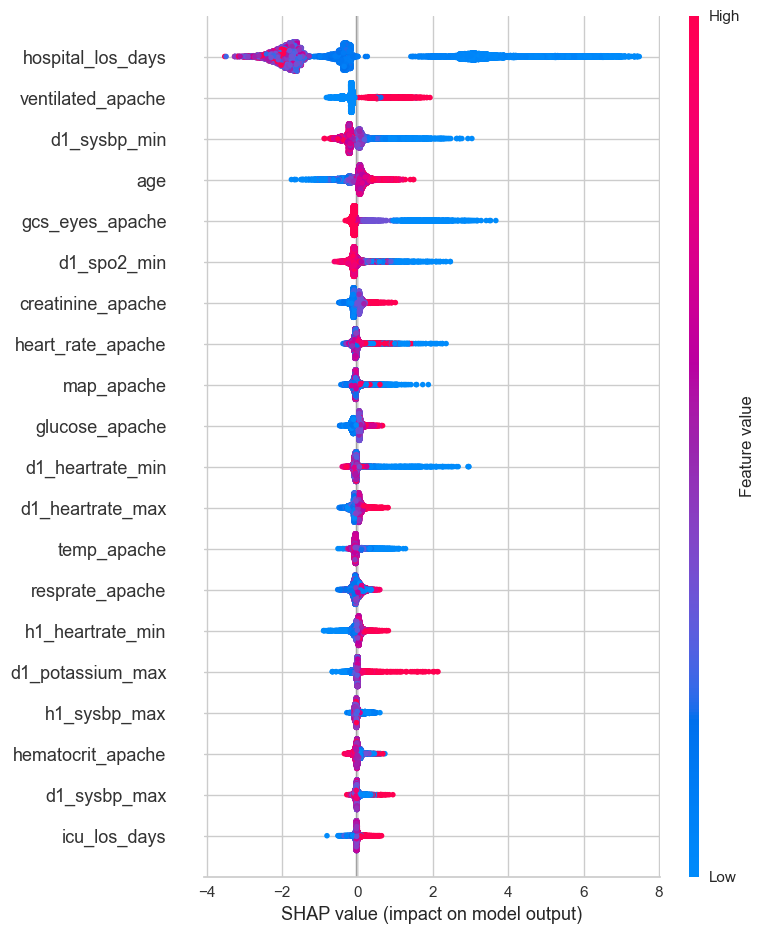

In [64]:
interpret_model(model)

In [56]:
model_with_smote = create_model('lightgbm', sampling='smote')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9764,0.9933,0.8533,0.7665,0.8076,0.7951,0.7964
1,0.9749,0.9900,0.8000,0.7742,0.7869,0.7736,0.7737
2,0.9838,0.9941,0.8867,0.8418,0.8636,0.8550,0.8553
3,0.9799,0.9926,0.7733,0.8657,0.8169,0.8063,0.8078
4,0.9780,0.9901,0.8067,0.8121,0.8094,0.7977,0.7977
5,0.9788,0.9924,0.8667,0.7879,0.8254,0.8141,0.8152
6,0.9749,0.9889,0.7733,0.7891,0.7811,0.7678,0.7679
7,0.9776,0.9925,0.7933,0.8151,0.8041,0.7922,0.7923
8,0.9780,0.9924,0.8133,0.8079,0.8106,0.7989,0.7990


In [ ]:
#logistic regression model


In [64]:
features_with_nan = onehot_data.columns[onehot_data.isna().any()].tolist()

print("Features containing NaN:")
print(features_with_nan)

Features containing NaN:
[]


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.metrics import accuracy_score, make_scorer

In [66]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Convert the data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set the model parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = np.round(model.predict(X_test))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print(y_pred)




[LightGBM] [Info] Number of positive: 1714, number of negative: 27885
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4837
[LightGBM] [Info] Number of data points in the train set: 29599, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057907 -> initscore=-2.789259
[LightGBM] [Info] Start training from score -2.789259
Accuracy: 0.9850
[0. 0. 0. ... 0. 0. 0.]


In [67]:
count = 0
for x in y_pred:
    if x==1:
        count = count+1
print(count)

447


In [58]:
y_pred1 = np.round(model.predict(new_data))
y_pred1

NameError: name 'new_data' is not defined

In [68]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6972
           1       0.85      0.89      0.87       428

    accuracy                           0.98      7400
   macro avg       0.92      0.94      0.93      7400
weighted avg       0.99      0.98      0.99      7400



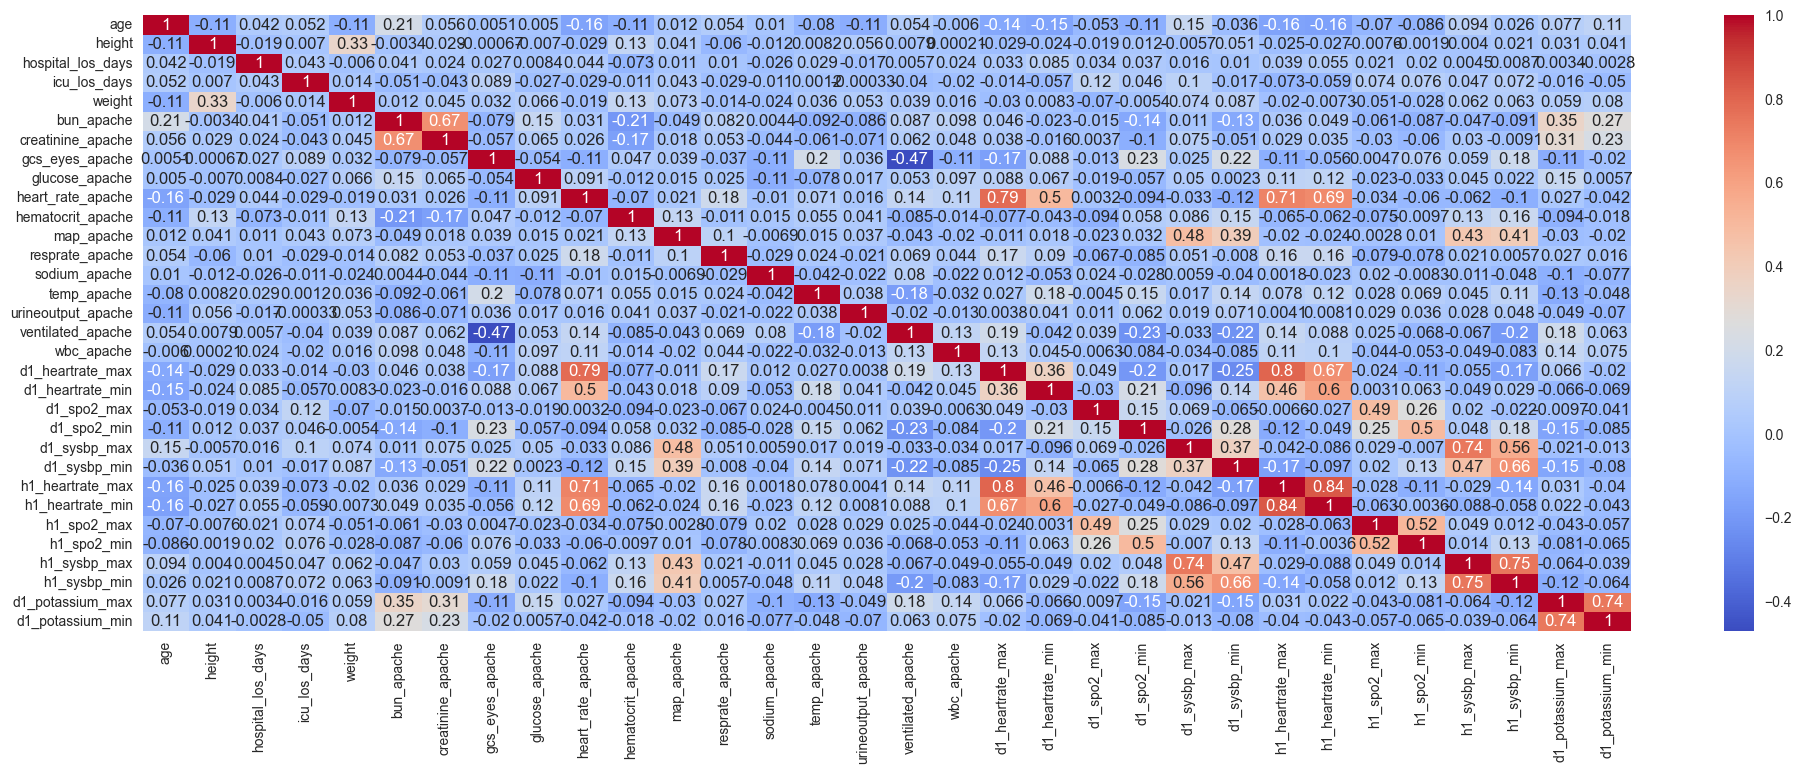

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'df' and its correlation matrix 'corr_matrix'
corr_matrix = x_data.corr()

# Increase figure size
plt.figure(figsize=(24, 8))  # Adjust width and height as needed

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [69]:
X_test

,age,bmi,elective_surgery,gender,height,hospital_los_days,icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,d1_arterial_ph_max,d1_arterial_ph_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
30253,0.651685,0.058222,0.0,0.0,0.507614,0.003222,0.810024,0.107583,0.436591,0.053140,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6369,0.898876,0.040392,0.0,0.0,0.530688,0.017547,0.987874,0.079331,0.436591,0.966184,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5975,0.584270,0.033441,0.0,0.0,0.578219,0.002131,0.804365,0.076958,0.436591,0.057971,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35943,0.280899,0.025750,0.0,0.5,0.554222,0.001384,0.168149,0.053904,0.436591,0.101449,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20361,0.460674,0.069648,0.0,0.5,0.590678,0.003654,0.433306,0.167364,0.500000,0.995169,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,0.528090,0.031840,0.0,0.0,0.484541,0.008817,0.741310,0.051079,0.436591,0.043478,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7467,0.865169,0.035634,0.0,0.0,0.507614,0.003602,0.901374,0.063657,0.565217,0.966184,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35478,0.674157,0.021238,0.0,0.0,0.554684,0.002700,0.922393,0.044073,0.586957,0.101449,...,0.633992,0.667635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24923,0.258427,0.034654,0.0,0.5,0.599908,0.001482,0.251415,0.085659,0.478261,0.062802,...,0.676154,0.465056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y_test_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [84]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6972
         1.0       0.85      0.82      0.84       428

    accuracy                           0.98      7400
   macro avg       0.92      0.91      0.91      7400
weighted avg       0.98      0.98      0.98      7400



In [85]:
y_test_pred1 = model.predict(new_data)

In [86]:
y_test_pred1

array([0.])

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
     

((104840, 218), (104840,), (26211, 218), (26211,))

<Axes: ylabel='count'>

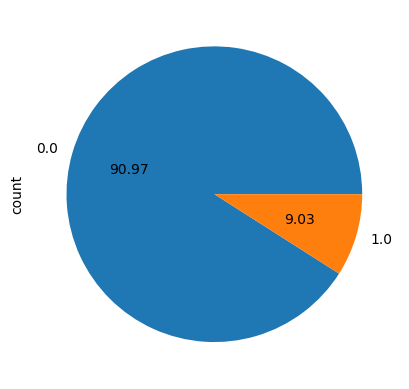

In [48]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [62]:

# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999884
1,MCC_CV,0.502379
2,MCC_test,0.515062


In [63]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     23833
         1.0       0.85      0.34      0.49      2378

    accuracy                           0.93     26211
   macro avg       0.89      0.67      0.73     26211
weighted avg       0.93      0.93      0.92     26211



In [63]:
X = x_data
y = y_data

feature_names = x_data # Extract feature names

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Match feature importances with feature names
feature_importance_dict = dict(zip(feature_names, importances))

# Sort features by importance
important_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or use important_features as needed
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: hospital_los_days, Importance: 0.20261117176465226
Feature: d1_spo2_min, Importance: 0.137047101254676
Feature: map_apache, Importance: 0.07613443293462406
Feature: gcs_eyes_apache, Importance: 0.06874880740921112
Feature: ventilated_apache, Importance: 0.06656623187353007
Feature: heart_rate_apache, Importance: 0.05662964462108985
Feature: temp_apache, Importance: 0.043951580093698
Feature: icu_los_days, Importance: 0.032813175952397536
Feature: creatinine_apache, Importance: 0.032356033282924156
Feature: age, Importance: 0.029654554568217875
Feature: bun_apache, Importance: 0.02494510777448287
Feature: h1_spo2_min, Importance: 0.024866130789669025
Feature: glucose_apache, Importance: 0.023863585111623217
Feature: h1_heartrate_max, Importance: 0.02165341608772629
Feature: h1_heartrate_min, Importance: 0.021002199706984585
Feature: resprate_apache, Importance: 0.020738420395111277
Feature: wbc_apache, Importance: 0.019370567096103165
Feature: weight, Importance: 0.018325599032

In [ ]:
['d1_lactate_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min' , 'apache_3j_diagnosis', 'd1_mbp_noninvasive_min','d1_bun_min', 'd1_platelets_max','d1_wbc_min','d1_diasbp_min', 'd1_glucose_min','d1_creatinine_min' , 'd1_arterial_ph_max' , 'ph_apache', 'd1_hco3_max', 'd1_pao2fio2ratio_max','d1_resprate_min', 'd1_diasbp_noninvasive_min' , 'd1_glucose_max','d1_hco3_min', 'd1_sysbp_max'    ]

In [55]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

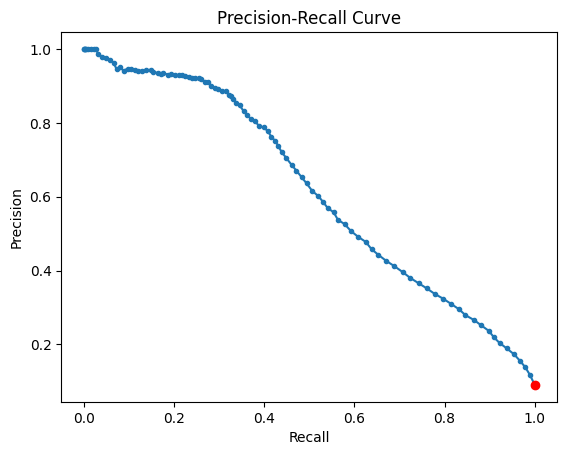

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     23843
         1.0       0.09      1.00      0.17      2368

    accuracy                           0.09     26211
   macro avg       0.05      0.50      0.08     26211
weighted avg       0.01      0.09      0.01     26211



In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have a trained classifier and a dataset
# classifier.predict_proba(X_test) should give you probabilities of positive class

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Adjust threshold for higher recall
desired_recall = 0.6  # Set your desired recall value
desired_threshold_index = next(i for i, rec in enumerate(recall) if rec >= desired_recall)
desired_threshold = thresholds[desired_threshold_index]

plt.plot(recall[desired_threshold_index], precision[desired_threshold_index], 'ro')  # Highlight point on the curve
plt.show()

# Use the desired threshold to make predictions
y_pred_thresholded = (y_scores >= desired_threshold).astype(int)

# Evaluate the performance of the adjusted model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresholded))


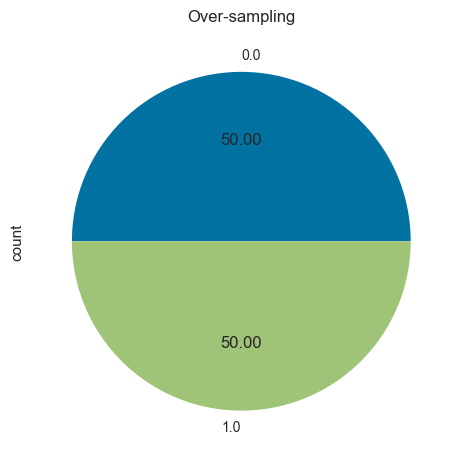

In [65]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
     

In [66]:

y_train_ros.value_counts()

hospital_death
0.0    95377
1.0    95377
Name: count, dtype: int64

In [67]:
# Set the model parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create a LightGBM classifier object and fit it to the training data
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train_ros, y_train_ros)
  

# Make predictions on the test set and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# # Use GridSearchCV to find the best hyperparameters for the model
# param_grid = {
#     'num_leaves': [15, 31 50],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
# }
# scoring = {'Accuracy': make_scorer(accuracy_score)}
# grid_search = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, refit='Accuracy', cv=5)
# grid_search.fit(X_train_ros, y_train_ros)
# print(f'Best parameters: {grid_search.best_params_}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 95377, number of negative: 95377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15222
[LightGBM] [Info] Number of data points in the train set: 190754, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9065


In [68]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     23833
         1.0       0.49      0.77      0.60      2378

    accuracy                           0.91     26211
   macro avg       0.73      0.85      0.77     26211
weighted avg       0.93      0.91      0.92     26211



In [55]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.981219
2,MCC_test,0.411495


In [57]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     23833
         1.0       0.70      0.28      0.40      2378

    accuracy                           0.92     26211
   macro avg       0.81      0.63      0.68     26211
weighted avg       0.91      0.92      0.91     26211



In [61]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df4 = pd.concat([df_labels, df_values], axis=1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999884
1,MCC_CV,0.329054
2,MCC_test,0.340549


In [62]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     23833
         1.0       0.75      0.18      0.29      2378

    accuracy                           0.92     26211
   macro avg       0.84      0.59      0.62     26211
weighted avg       0.91      0.92      0.90     26211



In [63]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values,
                df4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (class weights)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,0.999884,0.414351,0.422544
Class balancing (undersampling),1.000000,0.612386,0.399456
Class balancing (oversampling),1.000000,0.981219,0.411495
Class balancing (class weights),0.999884,0.329054,0.340549
